In [601]:
#importing necessary libraries and the dataset
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


dataframe= pd.read_csv("Bing-COVID19-Data.csv")

In [602]:
#we subset the dataframe to exclusively focus on worldwide data

Worldwide_data =dataframe.loc[dataframe.Country_Region=="Worldwide"]
Worldwide_data.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
0,338995,01/21/2020,262,nan,0.000000,nan,nan,nan,nan,nan,NaN,NaN,Worldwide,NaN,NaN
1,338996,01/22/2020,313,51.000000,0.000000,0.000000,nan,nan,nan,nan,NaN,NaN,Worldwide,NaN,NaN
2,338997,01/23/2020,578,265.000000,0.000000,0.000000,nan,nan,nan,nan,NaN,NaN,Worldwide,NaN,NaN
3,338998,01/24/2020,841,263.000000,0.000000,0.000000,nan,nan,nan,nan,NaN,NaN,Worldwide,NaN,NaN
4,338999,01/25/2020,1320,479.000000,0.000000,0.000000,nan,nan,nan,nan,NaN,NaN,Worldwide,NaN,NaN


In [603]:
#for worldwide data, we check which is the last date till which data was recorded
#22 may is the day when the latest data was recorded
Worldwide_data["Updated"].max()


'05/22/2020'

In [604]:
#we subset the Worldwide_data for 22 may
Worldwide_data_latest=Worldwide_data[Worldwide_data.Updated=='05/22/2020']

print("The total number of Confirmed cases in the world till 22 May 2020 were:",Worldwide_data_latest.loc[Worldwide_data_latest.Country_Region=="Worldwide","Confirmed"].to_string(index = False)) 
print("The total number of Deaths in the world till 22 May 2020 were:",Worldwide_data_latest.loc[Worldwide_data_latest.Country_Region=="Worldwide","Deaths"].to_string(index = False)) 
print("The total number of Recovered cases in the world till 22 May 2020 were:",Worldwide_data_latest.loc[Worldwide_data_latest.Country_Region=="Worldwide","Recovered"].to_string(index = False)) 

The total number of Confirmed cases in the world till 22 May 2020 were: 5180982
The total number of Deaths in the world till 22 May 2020 were: 336432.000000
The total number of Recovered cases in the world till 22 May 2020 were: 1992496.000000


In [605]:
#we see how the different types of cases have changed over time
#use the slider (in the second grpah) to Update  Worldwide cases over time graph to focus on particular dates


cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

temp = Worldwide_data.groupby('Updated')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Updated", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Updated", y="Count", color='Case', height=600,
             title='Worldwide Cases over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [606]:
#Now we see hoe teh daily number of cases and deaths have trended over the past few months
# ===================================

fig_c = px.bar(Worldwide_data, x="Updated", y="ConfirmedChange", color_discrete_sequence = [act])
fig_n = px.bar(Worldwide_data, x="Updated", y="DeathsChange", color_discrete_sequence = [dth])


fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('No. of new cases everyday throughout the world',
                                    'No. of new deaths everyday throughout the world'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_n['data'][0], row=1, col=2)
#fig.add_trace(fig_d['data'][0], row=1, col=3)

fig.update_layout(height=480)
fig.show()

In [ ]:
#_______________Now that we have seen overall trend worldwide, we look at the trends in countries indiviually

In [607]:
#now we see number of cases on '05/22/2020' for other countries, we put adminregion1 as null so we can see aggrregate data for the entire country
#we subset the dataframe and focus on confirmed, death and recovery cases for top 10 countries on 22 may and remove worldwide data 

dataframe2=dataframe[dataframe.Updated == '05/22/2020']
Country_latest= dataframe2[dataframe2['AdminRegion1'].isnull()]
Country_latest=Country_latest.loc[Country_latest.Country_Region !="Worldwide"]
Country_data_latest=Country_latest[["Country_Region","Confirmed","Deaths","Recovered"]].sort_values('Confirmed',ascending=False).head(10)

Country_data_latest

,Country_Region,Confirmed,Deaths,Recovered
61520,United States,1589223,89732.000000,313431.000000
3830,Brazil,330890,21048.000000,135430.000000
43405,Russia,326448,3249.000000,99825.000000
48823,Spain,282370,28678.000000,150376.000000
54199,United Kingdom,254195,36675.000000,nan
30869,Italy,228658,32616.000000,136720.000000
17382,Germany,177212,8174.000000,159007.000000
53677,Turkey,154500,4276.000000,116111.000000
16830,France,144566,28289.000000,64209.000000
29496,Iran,131652,7300.000000,102276.000000


In [608]:
#the data for Recovered cases for UK is missing so we impute it with the maximum value of recovered cases recorded in UK at some earlier date
UK=dataframe.loc[dataframe.Country_Region=="United Kingdom"]
UK= UK[UK['AdminRegion1'].isnull()]
UK["Recovered"].describe()

count     79.000000
mean     834.202532
std      925.036401
min        0.000000
25%       18.000000
50%      140.000000
75%     1918.000000
max     1918.000000
Name: Recovered, dtype: float64

In [609]:
#as we can see, 1918 is the number of maximum recovered cases so we impute missing data for 22 may UK with it
Country_data_latest["Recovered"].fillna(1918, inplace = True) 

#now after imputing the missing value, we check the dataframe again

Country_data_latest

,Country_Region,Confirmed,Deaths,Recovered
61520,United States,1589223,89732.000000,313431.000000
3830,Brazil,330890,21048.000000,135430.000000
43405,Russia,326448,3249.000000,99825.000000
48823,Spain,282370,28678.000000,150376.000000
54199,United Kingdom,254195,36675.000000,1918.000000
30869,Italy,228658,32616.000000,136720.000000
17382,Germany,177212,8174.000000,159007.000000
53677,Turkey,154500,4276.000000,116111.000000
16830,France,144566,28289.000000,64209.000000
29496,Iran,131652,7300.000000,102276.000000


In [610]:
fig = px.bar(Country_data_latest.sort_values('Confirmed',ascending=False)[:20][::-1],x='Confirmed',y='Country_Region',title='Confirmed Cases in top 10 Countries',text='Confirmed', height=900, orientation='h')
fig.show()

In [611]:
fig = px.bar(Country_data_latest.sort_values('Deaths',ascending=False)[:20][::-1],x='Deaths',y='Country_Region',title='Deaths in top 10 Countries',text='Deaths', height=900, orientation='h')
fig.show()

In [612]:
fig = px.bar(Country_data_latest.sort_values('Recovered',ascending=False)[:20][::-1],x='Recovered',y='Country_Region',title='Recovered Cases in top 10 Countries',text='Deaths', height=900, orientation='h')
fig.show()

In [613]:
Country_indiviual.head(10)

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
123,7170565,02/24/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
124,340556,02/25/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
125,340557,02/26/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
126,340558,02/27/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
127,340559,02/28/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
128,340560,02/29/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
129,340561,03/01/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
130,340562,03/02/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
131,340563,03/03/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
132,340564,03/04/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan


In [614]:
#we check for missing values, and as we can see the new columns we calculates have lot of na values
Country_indiviual.isna().sum()

ID                     0
Updated                0
Confirmed              0
ConfirmedChange        0
Deaths                 0
DeathsChange           0
Recovered              0
RecoveredChange        0
Latitude               0
Longitude              0
ISO2                 131
ISO3                  64
Country_Region         0
AdminRegion1       16807
AdminRegion2       16807
Mortality Rate       315
Recovery Rate       2116
Active Cases        2101
Closed Cases        2101
dtype: int64

In [615]:
#we replace the missing values with 0 as imputation using mean/ median etc would be wrong

Country_indiviual["ConfirmedChange"].fillna(0, inplace = True)
Country_indiviual["Deaths"].fillna(0, inplace = True)
Country_indiviual["DeathsChange"].fillna(0, inplace = True)
Country_indiviual["Recovered"].fillna(0, inplace = True)
Country_indiviual["RecoveredChange"].fillna(0, inplace = True)

C:\Users\imsid\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [616]:
Country_indiviual.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
123,7170565,02/24/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
124,340556,02/25/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
125,340557,02/26/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
126,340558,02/27/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan
127,340559,02/28/2020,1,0.000000,0.000000,0.000000,0.000000,0.000000,33.831140,66.024710,AF,AFG,Afghanistan,NaN,NaN,0.000000,nan,nan,nan


In [617]:
#now as we can see, all null values in appropriate columns have been replaces
Country_indiviual.isna().sum()

ID                     0
Updated                0
Confirmed              0
ConfirmedChange        0
Deaths                 0
DeathsChange           0
Recovered              0
RecoveredChange        0
Latitude               0
Longitude              0
ISO2                 131
ISO3                  64
Country_Region         0
AdminRegion1       16807
AdminRegion2       16807
Mortality Rate       315
Recovery Rate       2116
Active Cases        2101
Closed Cases        2101
dtype: int64

In [618]:
# Just like we did for country data, we replace the missing values in worldwide data with 0 as imputation using mean/ median etc would be wrong
Worldwide_data["ConfirmedChange"].fillna(0, inplace = True)
Worldwide_data["Deaths"].fillna(0, inplace = True)
Worldwide_data["DeathsChange"].fillna(0, inplace = True)
Worldwide_data["Recovered"].fillna(0, inplace = True)
Worldwide_data["RecoveredChange"].fillna(0, inplace = True)

In [619]:
#Similarly now we create new columns for worldwide data for mortality, recovery rate & active, closed cases throughout various months 

Worldwide_data["Mortality Rate"]=(Worldwide_data["Deaths"]/Worldwide_data["Confirmed"])*100
Worldwide_data["Recovery Rate"]=(Worldwide_data["Recovered"]/Worldwide_data["Confirmed"])*100
Worldwide_data["Active Cases"]=Worldwide_data["Confirmed"]-Worldwide_data["Recovered"]-Worldwide_data["Deaths"]
Worldwide_data["Closed Cases"]=Worldwide_data["Recovered"]+Worldwide_data["Deaths"]

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [620]:
#as we can see, there are no null values in the recovery rate etc columns

Worldwide_data.isna().sum()

ID                   0
Updated              0
Confirmed            0
ConfirmedChange      0
Deaths               0
DeathsChange         0
Recovered            0
RecoveredChange      0
Latitude           123
Longitude          123
ISO2               123
ISO3               123
Country_Region       0
AdminRegion1       123
AdminRegion2       123
Mortality Rate       0
Recovery Rate        0
Active Cases         0
Closed Cases         0
dtype: int64

In [621]:
Worldwide_data.tail()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
118,16188753,05/18/2020,4786672,76058.000000,317695.000000,2672.000000,1776641.000000,44297.000000,nan,nan,NaN,NaN,Worldwide,NaN,NaN,6.637075,37.116414,2692336.000000,2094336.000000
119,16631510,05/19/2020,4889287,102615.000000,322683.000000,4988.000000,1679155.000000,-97486.000000,nan,nan,NaN,NaN,Worldwide,NaN,NaN,6.599797,34.343556,2887449.000000,2001838.000000
120,17054212,05/20/2020,4968689,79402.000000,326515.000000,3832.000000,1885535.000000,206380.000000,nan,nan,NaN,NaN,Worldwide,NaN,NaN,6.571452,37.948340,2756639.000000,2212050.000000
121,17464727,05/21/2020,5076846,108157.000000,332425.000000,5910.000000,1936947.000000,51412.000000,nan,nan,NaN,NaN,Worldwide,NaN,NaN,6.547865,38.152566,2807474.000000,2269372.000000
122,17857536,05/22/2020,5180982,104136.000000,336432.000000,4007.000000,1992496.000000,55549.000000,nan,nan,NaN,NaN,Worldwide,NaN,NaN,6.493595,38.457883,2852054.000000,2328928.000000


In [622]:
#now we calculate the mortality rate and recovery rate for worldwide data

Worldwide_data_latest["Mortality Rate"]=(Worldwide_data_latest["Deaths"]/Worldwide_data_latest["Confirmed"])*100
Worldwide_data_latest["Recovery Rate"]=(Worldwide_data_latest["Recovered"]/Worldwide_data_latest["Confirmed"])*100

print("The Worldwide Mortality Rate is:",Worldwide_data_latest["Mortality Rate"].to_string(index = False),"%")
print("The Worldwide Recovery Rate is:",Worldwide_data_latest["Recovery Rate"].to_string(index = False),"%")

The Worldwide Mortality Rate is: 6.493595 %
The Worldwide Recovery Rate is: 38.457883 %


C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [623]:
#Plotting Mortality and Recovery Rate 

Worldwide_data_March=Worldwide_data.loc[Worldwide_data.Updated>="03/15/202"]

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=Worldwide_data_March.Updated, y=Worldwide_data_March["Recovery Rate"],name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=Worldwide_data_March.Updated, y=Worldwide_data_March["Mortality Rate"],name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate March onwards", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate March onwards", row=1, col=2)
fig.show()

In [624]:
#Average increase in number of Different Cases every day from January 2020 onwards

print("Average increase in number of Confirmed Cases every day: ",np.round(Worldwide_data["Confirmed"].diff().mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(Worldwide_data["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(Worldwide_data["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day:  42465.0
Average increase in number of Recovered Cases every day:  16199.0
Average increase in number of Deaths Cases every day:  2735.0


In [625]:
#Average increase in number of Different Cases every day from March 2020 onwards

print("Average increase in number of Confirmed Cases every day from March 2020 onwards: ",np.round(Worldwide_data_March["Confirmed"].diff().mean()))
print("Average increase in number of Recovered Cases every day from March 2020 onwards: ",np.round(Worldwide_data_March["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day from March 2020 onwards: ",np.round(Worldwide_data_March["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day from March 2020 onwards:  73933.0
Average increase in number of Recovered Cases every day from March 2020 onwards:  28877.0
Average increase in number of Deaths Cases every day from March 2020 onwards:  4793.0


In [ ]:
#as we can see, March onwards, there has been a very high surge of cases and deaths, the average detah rate per day has increased a lot

In [626]:
#now we create new columns for each indiviual country for mortality, recovery rate & active, closed cases for indiviual countries for 22 may 

Country_latest=Country_latest[["Country_Region","Confirmed","ConfirmedChange","Deaths","DeathsChange","Recovered","RecoveredChange"]]
Country_latest["Mortality Rate"]=(Country_latest["Deaths"]/Country_latest["Confirmed"])*100
Country_latest["Recovery Rate"]=(Country_latest["Recovered"]/Country_latest["Confirmed"])*100
Country_latest["Active Cases"]=Country_latest["Confirmed"]-Country_latest["Recovered"]-Country_indiviual["Deaths"]
Country_latest["Closed Cases"]=Country_latest["Recovered"]+Country_latest["Deaths"]

In [627]:
Country_latest.tail()

,Country_Region,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
218399,Vietnam,324,0.000000,0.000000,0.000000,267.000000,3.000000,0.000000,82.407407,57.000000,267.000000
218416,West Bank,368,0.000000,nan,nan,nan,nan,nan,nan,nan,nan
218455,Yemen,205,12.000000,33.000000,0.000000,6.000000,1.000000,16.097561,2.926829,166.000000,39.000000
218521,Zambia,920,54.000000,7.000000,0.000000,336.000000,34.000000,0.760870,36.521739,577.000000,343.000000
218584,Zimbabwe,51,0.000000,4.000000,0.000000,18.000000,0.000000,7.843137,35.294118,29.000000,22.000000


In [628]:
#now we check the number of null values
Country_latest.isna().sum()

Country_Region     0
Confirmed          0
ConfirmedChange    0
Deaths             2
DeathsChange       2
Recovered          5
RecoveredChange    5
Mortality Rate     3
Recovery Rate      5
Active Cases       5
Closed Cases       5
dtype: int64

In [629]:
#we impute the null values
Country_latest["Deaths"].fillna(0, inplace = True)
Country_latest["DeathsChange"].fillna(0, inplace = True)
Country_latest["Recovered"].fillna(0, inplace = True)
Country_latest["RecoveredChange"].fillna(0, inplace = True)

Country_latest["Recovery Rate"].fillna(0, inplace = True)
Country_latest["Mortality Rate"].fillna(0, inplace = True)
Country_latest["Active Cases"].fillna(0, inplace = True)
Country_latest["Closed Cases"].fillna(0, inplace = True)

In [ ]:
#______________now we make a cluster of countries to group countries with similar mortality, recovery rate togheter

In [630]:
Country_latest.head()

,Country_Region,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
211,Afghanistan,9216,0.000000,205.000000,0.000000,993.000000,55.000000,2.224392,10.774740,8018.000000,1198.000000
287,Albania,981,12.000000,31.000000,0.000000,777.000000,6.000000,3.160041,79.204893,173.000000,808.000000
375,Algeria,7918,190.000000,582.000000,7.000000,4256.000000,194.000000,7.350341,53.750947,3080.000000,4838.000000
434,American Samoa,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
516,Andorra,762,0.000000,51.000000,0.000000,652.000000,6.000000,6.692913,85.564304,59.000000,703.000000


In [631]:
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing

std=StandardScaler()
pd.set_option('display.float_format', lambda x: '%.6f' % x)

X=Country_latest[["Mortality Rate","Recovery Rate"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 

In [632]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

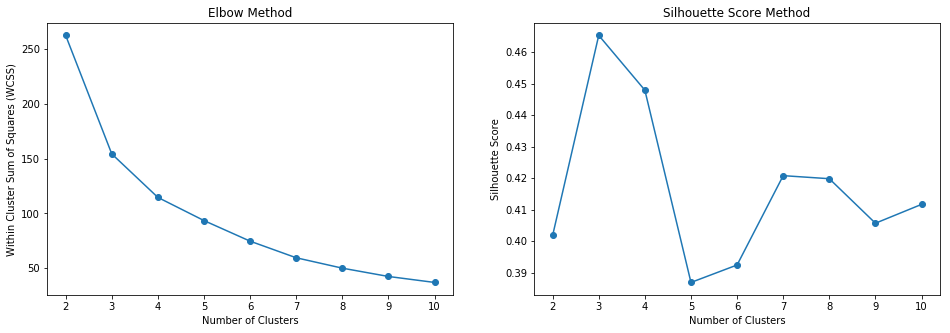

In [633]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

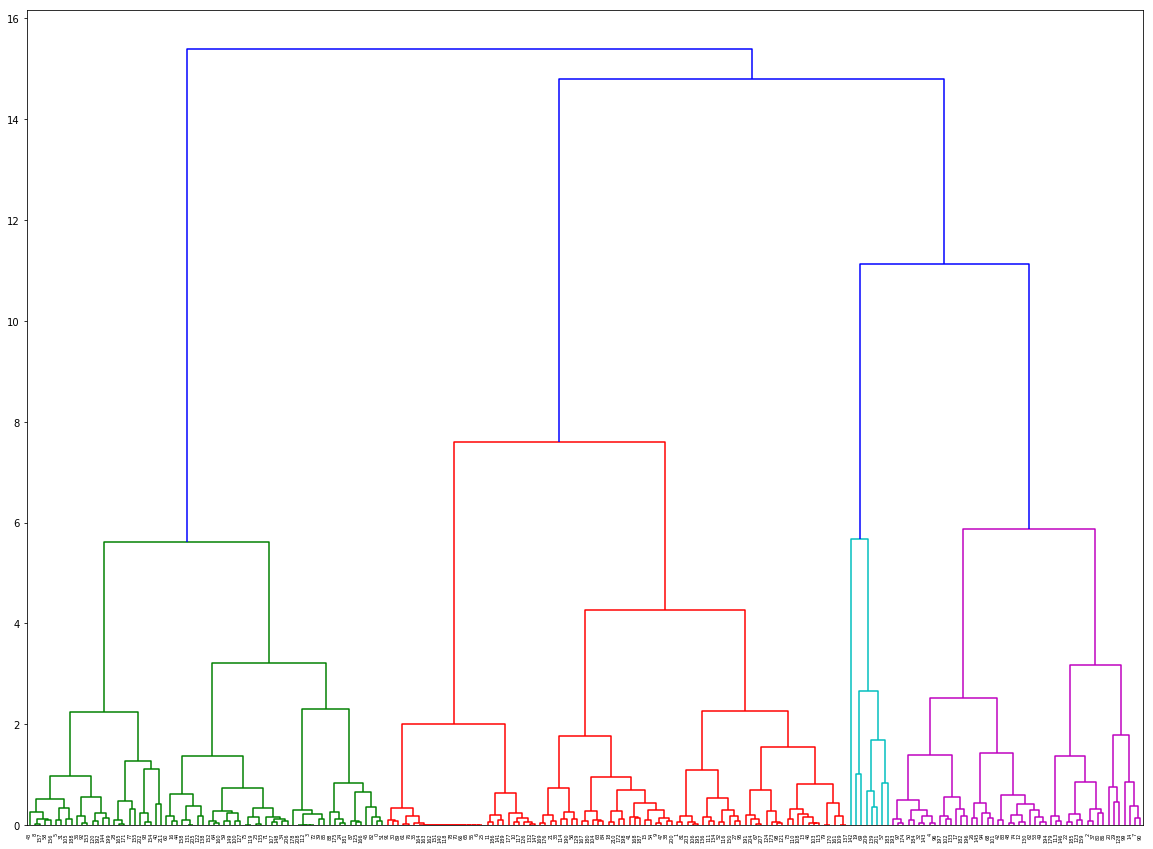

In [634]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))


In [635]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [636]:
Country_latest["Clusters"]=clf_final.predict(X)

In [637]:
Country_latest.head()

,Country_Region,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Mortality Rate,Recovery Rate,Active Cases,Closed Cases,Clusters
211,Afghanistan,9216,0.000000,205.000000,0.000000,993.000000,55.000000,2.224392,10.774740,8018.000000,1198.000000,1
287,Albania,981,12.000000,31.000000,0.000000,777.000000,6.000000,3.160041,79.204893,173.000000,808.000000,0
375,Algeria,7918,190.000000,582.000000,7.000000,4256.000000,194.000000,7.350341,53.750947,3080.000000,4838.000000,2
434,American Samoa,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
516,Andorra,762,0.000000,51.000000,0.000000,652.000000,6.000000,6.692913,85.564304,59.000000,703.000000,0


In [638]:
cluster_summary=pd.concat([Country_latest[Country_latest["Clusters"]==1].head(15),Country_latest[Country_latest["Clusters"]==2].head(15),Country_latest[Country_latest["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,Country_Region,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Mortality Rate,Recovery Rate,Active Cases,Closed Cases,Clusters
211,Afghanistan,9216,0,205,0,993,55,2.22439,10.7747,8018,1198,1
434,American Samoa,0,0,0,0,0,0,0,0,0,0,1
578,Angola,60,2,3,0,18,0,5,30,39,21,1
778,Argentina,10636,718,433,17,3062,142,4.07108,28.789,7141,3495,1
1567,Armenia,5928,161,74,4,2874,293,1.24831,48.4818,2980,2948,1
2824,Bahrain,8414,240,12,0,4096,223,0.142619,48.6808,4306,4108,1
2901,Bangladesh,30205,1694,432,24,6192,590,1.43023,20.4999,23581,6624,1
3054,Belarus,34303,932,190,5,12833,776,0.553887,37.4107,21280,13023,1
3289,Benin,135,0,3,0,61,0,2.22222,45.1852,71,64,1
3417,Bhutan,21,0,0,0,6,0,0,28.5714,15,6,1


In [639]:
print("Avergae Mortality Rate of Cluster 0: ",Country_latest[Country_latest["Clusters"]==0]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 0: ",Country_latest[Country_latest["Clusters"]==0]["Recovery Rate"].mean())
print("Avergae Mortality Rate of Cluster 1: ",Country_latest[Country_latest["Clusters"]==1]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 1: ",Country_latest[Country_latest["Clusters"]==1]["Recovery Rate"].mean())
print("Avergae Mortality Rate of Cluster 2: ",Country_latest[Country_latest["Clusters"]==2]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 2: ",Country_latest[Country_latest["Clusters"]==2]["Recovery Rate"].mean())

Avergae Mortality Rate of Cluster 0:  3.0119349709413337
Avergae Recovery Rate of Cluster 0:  83.09123767553145
Avergae Mortality Rate of Cluster 1:  2.28775619908053
Avergae Recovery Rate of Cluster 1:  29.764827334638966
Avergae Mortality Rate of Cluster 2:  12.481440941212174
Avergae Recovery Rate of Cluster 2:  39.260404889429566


In [575]:
#Green zone: Cluster 0 is a set of countries which have a High Mortality Rate and a very Good Recovery Rate. Basically few countries among these clusters have seen already the worst of this pandemic but are now recovering with healty Recovery Rate.

#Orange Roze: Cluster 1 is set of countries which have a relatively Low Mortality Rate but extremely poor Recovery Rate. These countries need to pace up their Revovery Rate to get out it, Some of these countries have really high number of Infected Cases but Low Mortality is positive sign out of it 

#Red zone: Cluster 2 is set of countries which have a very high Mortality Rate and moderate Recovery Rate.  Some of these countries have really high number of deaths 


In [640]:
print("Few Countries belonging to Cluster 0: ",Country_latest[Country_latest["Clusters"]==0].head(20).Country_Region)

Few Countries belonging to Cluster 0:  287                     Albania
516                     Andorra
629                    Anguilla
1637                      Aruba
1757                  Australia
2240                    Austria
2665                 Azerbaijan
2969                   Barbados
3343                    Bermuda
3611                    Bonaire
3691     Bosnia and Herzegovina
3743                   Botswana
4989                     Brunei
5141               Burkina Faso
5374                   Cambodia
7461           China (mainland)
9725                 Costa Rica
12244                   Croatia
12317                      Cuba
12389                   Curaçao
Name: Country_Region, dtype: object


In [641]:
print("Few Countries belonging to Cluster 1: ",(Country_latest[Country_latest["Clusters"]==1].tail(20).Country_Region))

Few Countries belonging to Cluster 1:  47122                  Senegal
47200                   Serbia
47319             Sierra Leone
47441                Singapore
47669                  Somalia
47748             South Africa
48710              South Sudan
50562                    Sudan
53088               Tajikistan
53155                 Tanzania
53314               The Gambia
53453                     Togo
53889                   Uganda
53970                  Ukraine
54085     United Arab Emirates
61520            United States
218206            Vatican City
218277               Venezuela
218416               West Bank
218521                  Zambia
Name: Country_Region, dtype: object


In [642]:
print("Few Countries belonging to Cluster 2: ",(Country_latest[Country_latest["Clusters"]==2].tail(20).Country_Region))

Few Countries belonging to Cluster 2:  3164                       Belgium
3224                        Belize
4914        British Virgin Islands
5572                        Canada
6691                          Chad
14729                      Ecuador
16830                       France
19098                       Guyana
19903                      Hungary
30869                        Italy
35347                      Liberia
36506                       Mexico
38451                  Netherlands
39127                    Nicaragua
39430     Northern Mariana Islands
48823                        Spain
50741                       Sweden
54199               United Kingdom
218455                       Yemen
218584                    Zimbabwe
Name: Country_Region, dtype: object


In [ ]:
#____________now that we have analyzed worldwide data, USA had the maximum cases and maximum deaths, so lets analyze USA

In [643]:
#we subset the dataset to see cases for all states in USA 

USA_data= dataframe.loc[dataframe.Country_Region=="United States"]
USA_data2= USA_data[USA_data['AdminRegion1'].isnull()] #record of all cases for all states in USA throuhout the past months
USA_data_latest=USA_data2[USA_data2.Updated=='05/22/2020'] #cumulative cases for all states in USA on 22 May

USA_data2.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
61399,7157150,01/21/2020,1,nan,nan,nan,nan,nan,39.495910,-98.989980,US,USA,United States,NaN,NaN
61400,339285,01/23/2020,1,0.000000,0.000000,nan,nan,nan,39.495910,-98.989980,US,USA,United States,NaN,NaN
61401,7157151,01/24/2020,2,1.000000,0.000000,0.000000,nan,nan,39.495910,-98.989980,US,USA,United States,NaN,NaN
61402,7157152,01/25/2020,3,1.000000,0.000000,0.000000,nan,nan,39.495910,-98.989980,US,USA,United States,NaN,NaN
61403,7157155,01/26/2020,5,2.000000,0.000000,0.000000,nan,nan,39.495910,-98.989980,US,USA,United States,NaN,NaN


In [644]:
print("total number of confirmed cases in the United States of America till 22 May 2020 were:",USA_data_latest["Confirmed"].to_string(index = False)) 
print("total number of deaths in the United States of America till 22 May 2020 were:",USA_data_latest["Deaths"].to_string(index = False)) 
print("total number of recovered cases in the United States of America till 22 May 2020 were:",USA_data_latest["Recovered"].to_string(index = False)) 


total number of confirmed cases in the United States of America till 22 May 2020 were: 1589223
total number of deaths in the United States of America till 22 May 2020 were: 89732.000000
total number of recovered cases in the United States of America till 22 May 2020 were: 313431.000000


In [645]:
#use the slider o the Update graph below to focus on particular dates

cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

temp = USA_data2.groupby('Updated')['Recovered', 'Deaths', 'Confirmed'].sum().reset_index()
temp = temp.melt(id_vars="Updated", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Updated", y="Count", color='Case', height=600,
             title='Different types of Cases in USA over time', color_discrete_sequence = [rec, dth, act])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [646]:
#Now we see hoe teh daily number of cases and deaths have trended over the past few months
# ===================================

fig_c = px.bar(USA_data2, x="Updated", y="ConfirmedChange", color_discrete_sequence = [act])
fig_n = px.bar(USA_data2, x="Updated", y="DeathsChange", color_discrete_sequence = [dth])


fig = make_subplots(rows=1, cols=2, shared_xaxes=False, horizontal_spacing=0.1,
                    subplot_titles=('No. of new cases everyday in USA',
                                    'No. of new deaths everyday in USA'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_n['data'][0], row=1, col=2)
#fig.add_trace(fig_d['data'][0], row=1, col=3)

fig.update_layout(height=480)
fig.show()

In [647]:
#we subset the dataset to see cases for INDIVIUAL states in USA 

USA_states= USA_data[USA_data['AdminRegion2'].isnull()] #record of all cases for all states in USA throuhout the past months
USA_states= USA_states[USA_data['AdminRegion1'].notnull()]

USA_states_latest=USA_states[USA_states.Updated=='05/22/2020'] #cumulative cases for all states in USA on 22 May

USA_states.head()

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2
61522,2509,01/21/2020,0,nan,nan,nan,nan,nan,63.174120,-153.704300,US,USA,United States,Alaska,NaN
61523,2510,01/24/2020,0,0.000000,nan,nan,nan,nan,63.174120,-153.704300,US,USA,United States,Alaska,NaN
61524,2511,01/25/2020,0,0.000000,nan,nan,nan,nan,63.174120,-153.704300,US,USA,United States,Alaska,NaN
61525,2512,01/26/2020,0,0.000000,nan,nan,nan,nan,63.174120,-153.704300,US,USA,United States,Alaska,NaN
61526,2513,01/30/2020,0,0.000000,nan,nan,nan,nan,63.174120,-153.704300,US,USA,United States,Alaska,NaN


In [648]:
USA_state_wise=USA_states_latest[["AdminRegion1","Confirmed","Deaths"]].sort_values('Confirmed',ascending=False)
USA_state_wise.head(10)

,AdminRegion1,Confirmed,Deaths
161664,New York,359926,23282.000000
157836,New Jersey,152719,10985.000000
99677,Illinois,105444,4715.000000
122803,Massachusetts,90889,6228.000000
71198,California,86197,3542.000000
176523,Pennsylvania,66258,4984.000000
126259,Michigan,53913,5158.000000
190551,Texas,53449,1480.000000
79581,Florida,49451,2190.000000
123835,Maryland,44424,2092.000000


In [649]:
USA_TOP_10=USA_state_wise.head(10)
fig = px.bar(USA_TOP_10.sort_values('Confirmed',ascending=False)[:20][::-1],x='Confirmed',y='AdminRegion1',title='Confirmed Cases in top 10 States in USA',text='Confirmed', height=900, orientation='h')
fig.show()

In [650]:
fig = px.bar(USA_TOP_10.sort_values('Deaths',ascending=False)[:20][::-1],x='Deaths',y='AdminRegion1',title='Deaths in top 10 States in USA',text='Deaths', height=900, orientation='h')
fig.show()

In [651]:
#calculating mortality and recovery rate for USA for all cases ie 22 may

USA_data_latest["Mortality Rate"]=(USA_data_latest["Deaths"]/USA_data_latest["Confirmed"])*100
USA_data_latest["Recovery Rate"]=(USA_data_latest["Recovered"]/USA_data_latest["Confirmed"])*100

print("The Mortality Rate in USA is:",USA_data_latest["Mortality Rate"].to_string(index = False),"%")
print("The Recovery Rate in USA is:",USA_data_latest["Recovery Rate"].to_string(index = False),"%")



The Mortality Rate in USA is: 5.646281 %
The Recovery Rate in USA is: 19.722279 %


C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [652]:
#now as we can see, all null values have been replaces
USA_data2.isna().sum()

ID                   0
Updated              0
Confirmed            0
ConfirmedChange      1
Deaths               1
DeathsChange         2
Recovered           24
RecoveredChange     30
Latitude             0
Longitude            0
ISO2                 0
ISO3                 0
Country_Region       0
AdminRegion1       123
AdminRegion2       123
dtype: int64

In [653]:
#imputing null values

USA_data2["ConfirmedChange"].fillna(0, inplace = True)
USA_data2["Deaths"].fillna(0, inplace = True)
USA_data2["DeathsChange"].fillna(0, inplace = True)
USA_data2["Recovered"].fillna(0, inplace = True)
USA_data2["RecoveredChange"].fillna(0, inplace = True)

C:\Users\imsid\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [654]:
#calculating mortality and recovery rate for USA

USA_data2["Mortality Rate"]=(USA_data2["Deaths"]/USA_data2["Confirmed"])*100
USA_data2["Recovery Rate"]=(USA_data2["Recovered"]/USA_data2["Confirmed"])*100
USA_data2["Active Cases"]=USA_data2["Confirmed"]-USA_data2["Recovered"]-USA_data2["Deaths"]
USA_data2["Closed Cases"]=USA_data2["Recovered"]+USA_data2["Deaths"]

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [655]:
#Plotting Mortality and Recovery Rate 

USA_data_March=USA_data2.loc[USA_data2.Updated>="03/15/202"]

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=USA_data_March.Updated, y=USA_data_March["Recovery Rate"],name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=USA_data_March.Updated, y=USA_data_March["Mortality Rate"],name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate March onwards", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate March onwards", row=1, col=2)
fig.show()

In [656]:
#Average increase in number of Different Cases IN USA every day from January 2020 onwards

print("Average increase in number of Confirmed Cases every day from January onwards: ",np.round(USA_data2["Confirmed"].diff().mean()))
print("Average increase in number of Recovered Cases every day January onwards: ",np.round(USA_data2["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day January onwards: ",np.round(USA_data2["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day from January onwards:  13211.0
Average increase in number of Recovered Cases every day January onwards:  2719.0
Average increase in number of Deaths Cases every day January onwards:  738.0


In [657]:
#Average increase in number of Different Cases IN USA every day from March 2020 onwards

print("Average increase in number of Confirmed Cases every day from March onwards: ",np.round(USA_data_March["Confirmed"].diff().mean()))
print("Average increase in number of Recovered Cases every day from March onwards: ",np.round(USA_data_March["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day from March onwards: ",np.round(USA_data_March["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day from March onwards:  23307.0
Average increase in number of Recovered Cases every day from March onwards:  4777.0
Average increase in number of Deaths Cases every day from March onwards:  1296.0


In [658]:
#by comparing the average increase from januray & march, we notice there is a bigger increse from march, which suggets a increasing trend of cases

In [659]:
USA_states["Mortality Rate"]=(USA_states["Deaths"]/USA_states["Confirmed"])*100
USA_states["Recovery Rate"]=(USA_states["Recovered"]/USA_states["Confirmed"])*100
USA_states["Active Cases"]=USA_states["Confirmed"]-USA_states["Recovered"]-USA_states["Deaths"]
USA_states["Closed Cases"]=USA_states["Recovered"]+USA_states["Deaths"]

In [283]:
#USA_states_March=USA_states[USA_states.Updated>="05/01/202"]
#USA_states_March.head()

,ID,Updated,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,ISO2,ISO3,Country_Region,AdminRegion1,AdminRegion2,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
61596,8558217,05/01/2020,364,9.000000,9.000000,0.000000,29.000000,0.000000,63.174120,-153.704300,US,USA,United States,Alaska,NaN,nan,nan,nan,nan
61597,8925118,05/02/2020,366,2.000000,9.000000,0.000000,29.000000,0.000000,63.174120,-153.704300,US,USA,United States,Alaska,NaN,nan,nan,nan,nan
61598,9393818,05/03/2020,368,2.000000,9.000000,0.000000,29.000000,0.000000,63.174120,-153.704300,US,USA,United States,Alaska,NaN,nan,nan,nan,nan
61599,9761405,05/04/2020,370,2.000000,9.000000,0.000000,29.000000,0.000000,63.174120,-153.704300,US,USA,United States,Alaska,NaN,nan,nan,nan,nan
61600,10310815,05/05/2020,371,1.000000,9.000000,0.000000,29.000000,0.000000,63.174120,-153.704300,US,USA,United States,Alaska,NaN,nan,nan,nan,nan


In [660]:
USA_data= dataframe.loc[dataframe.Country_Region=="United States"]
USA_data2= USA_data[USA_data['AdminRegion1'].isnull()] #record of all cases for all states in USA throuhout the past months
USA_data_latest=USA_data2[USA_data2.Updated=='05/22/2020']

In [661]:
USA_states= USA_data[USA_data['AdminRegion2'].isnull()] #record of all cases for all states in USA throuhout the past months
USA_states= USA_states[USA_data['AdminRegion1'].notnull()]

USA_states= USA_data[USA_data['AdminRegion2'].isnull()] #record of all cases for all states in USA throuhout the past months
USA_states= USA_states[USA_data['AdminRegion1'].notnull()]

USA_states_latest=USA_states[USA_states.Updated=='05/22/2020'] #cumulative cases for all states in USA on 22 May


C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\imsid\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [662]:
USA_states["Mortality Rate"]=(USA_states["Deaths"]/USA_states["Confirmed"])*100
USA_states["Recovery Rate"]=(USA_states["Recovered"]/USA_states["Confirmed"])*100
USA_states["Active Cases"]=USA_states["Confirmed"]-USA_states["Recovered"]-USA_states["Deaths"]
USA_states["Closed Cases"]=USA_states["Recovered"]+USA_states["Deaths"]



In [663]:
#Since there is no data for recoveries in washington, we remove it from the analysis

USA_states2=USA_states.groupby('AdminRegion1').mean().reset_index()
USA_states2 = USA_states2[USA_states2.AdminRegion1 !="Washington"]
USA_states2.head()

,AdminRegion1,ID,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange,Latitude,Longitude,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
0,Alabama,4842166.937500,3652.072917,137.926316,184.220588,8.044776,0.000000,0.000000,32.766500,-86.840310,2.535512,0.000000,84.285714,0.000000
1,Alaska,4845570.156250,181.541667,4.231579,6.661765,0.149254,50.346939,-1.043478,63.174120,-153.704300,2.206365,15.111842,244.040816,58.285714
2,Arizona,7022795.781250,4075.593750,161.210526,228.972973,10.746479,0.411765,0.000000,34.293080,-111.664700,3.014221,1.161101,1698.000000,53.117647
3,Arkansas,4842670.135417,1540.572917,59.073684,44.176471,1.686567,1400.105263,71.890909,34.899920,-92.438870,1.639505,40.298358,1067.280702,1451.982456
4,California,8147774.281250,25482.010417,907.336842,1191.050000,44.822785,245.625000,-1.000000,37.255100,-119.617500,3.019377,1.455076,3795.875000,373.875000


In [664]:

#Standard Scaling since K-Means Clustering is a distance based alogrithm

USA_states2=USA_states2[["AdminRegion1","Mortality Rate","Recovery Rate"]]

from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing

std=StandardScaler()
pd.set_option('display.float_format', lambda x: '%.6f' % x)

X2=USA_states2[["Mortality Rate","Recovery Rate"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X2=std.fit_transform(X2) 

In [665]:
# from the previou sanalysis, we know that All the three methods namely Elbow Method, Silhouette Score and Hierarchical Clustering show K=3 will be the correct number of clusters.



In [666]:
clf_final2=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final2.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=6, tol=0.0001, verbose=0)

In [667]:
USA_states2["Clusters"]=clf_final2.predict(X2)
cluster_summary=pd.concat([USA_states2[USA_states2["Clusters"]==1].head(15),USA_states2[USA_states2["Clusters"]==2].head(15),USA_states2[USA_states2["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')


,AdminRegion1,Mortality Rate,Recovery Rate,Clusters
3,Arkansas,1.6395,40.2984,1
11,Hawaii,1.50699,60.4316,1
15,Iowa,1.73092,26.6551,1
19,Maine,2.96441,36.574,1
23,Minnesota,3.51368,46.9313,1
26,Montana,2.1486,46.1188,1
28,Nevada,3.46168,45.3023,1
29,New Hampshire,2.27663,23.5147,1
31,New Mexico,2.45376,21.9456,1
34,North Dakota,1.68544,28.2824,1


In [668]:
print("Avergae Mortality Rate of Cluster 0: ",USA_states2[USA_states2["Clusters"]==0]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 0: ",USA_states2[USA_states2["Clusters"]==0]["Recovery Rate"].max())
print("Avergae Mortality Rate of Cluster 1: ",USA_states2[USA_states2["Clusters"]==1]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 1: ",USA_states2[USA_states2["Clusters"]==1]["Recovery Rate"].max())
print("Avergae Mortality Rate of Cluster 2: ",USA_states2[USA_states2["Clusters"]==2]["Mortality Rate"].mean())
print("Avergae Recovery Rate of Cluster 2: ",USA_states2[USA_states2["Clusters"]==2]["Recovery Rate"].max())

Avergae Mortality Rate of Cluster 0:  2.79112098597995
Avergae Recovery Rate of Cluster 0:  15.111841827586671
Avergae Mortality Rate of Cluster 1:  2.2019218751111187
Avergae Recovery Rate of Cluster 1:  60.431595121875006
Avergae Mortality Rate of Cluster 2:  4.871025727563825
Avergae Recovery Rate of Cluster 2:  18.54597621310167


In [669]:
print("Few States belonging to Cluster 0: ",list(USA_states2[USA_states2["Clusters"]==0].head(30).AdminRegion1))


Few States belonging to Cluster 0:  ['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Kansas', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Utah', 'Virginia', 'West Virginia', 'Wisconsin']


In [670]:
print("Few States belonging to Cluster 1: ",list(USA_states2[USA_states2["Clusters"]==1].head(30).AdminRegion1))


Few States belonging to Cluster 1:  ['Arkansas', 'Hawaii', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nevada', 'New Hampshire', 'New Mexico', 'North Dakota', 'Oklahoma', 'South Dakota', 'Tennessee', 'Texas', 'Wyoming']


In [671]:
print("Few States belonging to Cluster 2: ",list(USA_states2[USA_states2["Clusters"]==2].head(30).AdminRegion1))

Few States belonging to Cluster 2:  ['Connecticut', 'Indiana', 'Kentucky', 'Louisiana', 'Michigan', 'New Jersey', 'Vermont']
